In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
from google.colab import drive 
plt.style.use('dark_background')
matplotlib.rcParams["figure.figsize"] = (20,10)

In [ ]:
#Importing dataset csv file
from google.colab import files
uploaded = files.upload()
# drive.mount('/content/gdrive')
# df1 = pd.read_csv('gdrive/My Drive/Colab Notebooks/kl_house_data.csv')

Saving kl_house_data.csv to kl_house_data (3).csv


# **Data Pre Processing**

In [ ]:
df1 = pd.read_csv("kl_house_data.csv")
df1.head(5)

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished


In [ ]:
df1.shape

(53883, 8)

In [ ]:
df1.groupby('Location')['Location'].agg('count').sort_values(ascending=False)

Location
Mont Kiara, Kuala Lumpur                           5897
KLCC, Kuala Lumpur                                 5228
Cheras, Kuala Lumpur                               4533
Jalan Klang Lama (Old Klang Road), Kuala Lumpur    2854
Setapak, Kuala Lumpur                              2710
                                                   ... 
Solaris Dutamas, Kuala Lumpur                         1
Sri Kembangan, Kuala Lumpur                           1
Sungai Long SL8, Kuala Lumpur                         1
TAMAN MELATI, Kuala Lumpur                            1
taman connaught, Kuala Lumpur                         1
Name: Location, Length: 112, dtype: int64

In [ ]:
df2 = df1.dropna()
df2.isnull().sum()
df2.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
5,"Taman Tun Dr Ismail, Kuala Lumpur","RM 5,350,000",4+2,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished
7,"Taman Tun Dr Ismail, Kuala Lumpur","RM 2,600,000",5,4.0,4.0,Semi-detached House,Land area : 3600 sq. ft.,Partly Furnished


In [ ]:
#Remove RM
df3 = df2.copy()
df3['Price'] = df3['Price'].apply(lambda x: int(x.split(' ')[1].replace(',', '')))
df3

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur",1250000,2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
2,"Dutamas, Kuala Lumpur",1030000,3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
4,"Bukit Jalil, Kuala Lumpur",900000,4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
5,"Taman Tun Dr Ismail, Kuala Lumpur",5350000,4+2,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished
7,"Taman Tun Dr Ismail, Kuala Lumpur",2600000,5,4.0,4.0,Semi-detached House,Land area : 3600 sq. ft.,Partly Furnished
...,...,...,...,...,...,...,...,...
53862,"Seputeh, Kuala Lumpur",750000,3,2.0,1.0,Condominium,Built-up : 915 sq. ft.,Partly Furnished
53868,"KL Sentral, Kuala Lumpur",1400000,3+1,3.0,2.0,Condominium (Corner),Land area : 1544 sq. ft.,Fully Furnished
53869,"KL Eco City, Kuala Lumpur",880000,1,1.0,1.0,Condominium (Corner),Built-up : 650 sq. ft.,Partly Furnished
53876,"Sri Hartamas, Kuala Lumpur",2700000,4+2,6.0,3.0,Condominium (Corner),"Built-up : 3,973 sq. ft.",Partly Furnished


In [ ]:
list(df3['Rooms'].unique())

['2+1',
 '3',
 '4+1',
 '4+2',
 '5',
 '6+1',
 '3+2',
 '1',
 '3+1',
 '2',
 '6',
 '4',
 '1+1',
 '5+1',
 '2+2',
 'Studio',
 '7+1',
 '7',
 '14',
 '5+2',
 '12',
 '7+',
 '8+',
 '8',
 '8+1',
 '13+',
 '20 Above',
 '10',
 '1+2',
 '9',
 '6+',
 '10+1',
 '15+',
 '9+1',
 '10+',
 '11',
 '13+1',
 '12+',
 '16',
 '13']

In [ ]:
def split_sum(col):
  # if not col:
  #   return 0

  if col == 'Studio':
    return 1

  if col == '20 Above':
    return 20
    
  total = 0
  for item in col.split("+"):
    if item:
      total+=int(item)
  return total

In [ ]:
df3['Rooms'] = df3['Rooms'].fillna(0)

In [ ]:
#Split rooms
df4 = df3.copy()
df4['Rooms'] = df4['Rooms'].apply(split_sum)
df4.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur",1250000,3,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
2,"Dutamas, Kuala Lumpur",1030000,3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
4,"Bukit Jalil, Kuala Lumpur",900000,5,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
5,"Taman Tun Dr Ismail, Kuala Lumpur",5350000,6,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished
7,"Taman Tun Dr Ismail, Kuala Lumpur",2600000,5,4.0,4.0,Semi-detached House,Land area : 3600 sq. ft.,Partly Furnished


In [ ]:
#Check Bathrooms
list(df4['Bathrooms'].unique())

[3.0,
 4.0,
 5.0,
 2.0,
 7.0,
 6.0,
 1.0,
 9.0,
 8.0,
 16.0,
 13.0,
 20.0,
 10.0,
 14.0,
 15.0,
 11.0,
 12.0]

In [ ]:
#Check Carparks
list(df4['Car Parks'].unique())

[2.0,
 4.0,
 3.0,
 1.0,
 5.0,
 6.0,
 7.0,
 10.0,
 9.0,
 8.0,
 15.0,
 28.0,
 13.0,
 11.0,
 20.0,
 12.0,
 18.0,
 30.0,
 24.0,
 16.0,
 17.0]

In [ ]:
def adj_text(col):
  # if not col:
  #   return 0

  if col[0] == 'L':
    return ('Land-' + col[5:])
  
  elif col[0] == 'B':
    return col


In [ ]:
def unit_meas(col):
  if col[-7:] == "sq. ft.":
    return ('FT')
  
  elif col[-6:] == "sq. m.":
    return ("M")

In [ ]:
def get_num(col):
  if col[0] == 'L':
    return (col[12:-7])
  
  elif col[0] == 'B':
    return (col[10:-7])

In [ ]:
def sanitize_diff(col):
  try:
    col_int = int(col.replace(",", ""))
    return col_int
  except ValueError:
    return None

In [ ]:
def sqm_to_sqft(col):
  if col['Unit_Meas'] == "M":
    return (col['Size_New'] * 10.7639)
  else:
    return col['Size_New']

In [ ]:
#Adjust Size
df5 = df4.copy()

#Make new column
df5['Size_New'] = df5['Size']
df5['Unit_Meas'] = df5['Size'].apply(unit_meas)

#Remove "Built-Area : " & "Land Area : " & 
df5['Size_New'] = df5['Size_New'].apply(get_num)

#Remove hard to clean data
df5['Size_New'] = df5['Size_New'].apply(sanitize_diff)

#Convert SQM to SQFT
df6 = df5.dropna()
df6['Size_New'] = df6.apply(sqm_to_sqft, axis=1)

df6.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Size_New,Unit_Meas
0,"KLCC, Kuala Lumpur",1250000,3,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished,1335.0,FT
2,"Dutamas, Kuala Lumpur",1030000,3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished,1875.0,FT
4,"Bukit Jalil, Kuala Lumpur",900000,5,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished,1513.0,FT
5,"Taman Tun Dr Ismail, Kuala Lumpur",5350000,6,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished,7200.0,FT
7,"Taman Tun Dr Ismail, Kuala Lumpur",2600000,5,4.0,4.0,Semi-detached House,Land area : 3600 sq. ft.,Partly Furnished,3600.0,FT


In [ ]:
def unknown_furn(col):
  if col == 'Unknown':
    return None
  else:
    return col

In [ ]:
#Furnishing
df7 = df6.copy()
df7['Furnishing'] = df7['Furnishing'].apply(unknown_furn)

df8 = df7.dropna()

df8.head()
#Drop Columns
df9 = df8[['Location', 'Price','Size_New', 'Rooms', 'Bathrooms', 'Car Parks', 'Furnishing']]
df9.rename(columns={'Size_New':'Size'}, inplace=True)
df9.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Location,Price,Size,Rooms,Bathrooms,Car Parks,Furnishing
0,"KLCC, Kuala Lumpur",1250000,1335.0,3,3.0,2.0,Fully Furnished
2,"Dutamas, Kuala Lumpur",1030000,1875.0,3,4.0,2.0,Partly Furnished
4,"Bukit Jalil, Kuala Lumpur",900000,1513.0,5,3.0,2.0,Partly Furnished
5,"Taman Tun Dr Ismail, Kuala Lumpur",5350000,7200.0,6,5.0,4.0,Partly Furnished
7,"Taman Tun Dr Ismail, Kuala Lumpur",2600000,3600.0,5,4.0,4.0,Partly Furnished


# **Feature Engineering**

In [ ]:
df10 = df9.copy()
df10['Price_Per_Sqft'] = df10['Price']/df10['Size']
df10

,Location,Price,Size,Rooms,Bathrooms,Car Parks,Furnishing,Price_Per_Sqft
0,"KLCC, Kuala Lumpur",1250000,1335.0,3,3.0,2.0,Fully Furnished,936.329588
2,"Dutamas, Kuala Lumpur",1030000,1875.0,3,4.0,2.0,Partly Furnished,549.333333
4,"Bukit Jalil, Kuala Lumpur",900000,1513.0,5,3.0,2.0,Partly Furnished,594.844679
5,"Taman Tun Dr Ismail, Kuala Lumpur",5350000,7200.0,6,5.0,4.0,Partly Furnished,743.055556
7,"Taman Tun Dr Ismail, Kuala Lumpur",2600000,3600.0,5,4.0,4.0,Partly Furnished,722.222222
...,...,...,...,...,...,...,...,...
53862,"Seputeh, Kuala Lumpur",750000,915.0,3,2.0,1.0,Partly Furnished,819.672131
53868,"KL Sentral, Kuala Lumpur",1400000,1544.0,4,3.0,2.0,Fully Furnished,906.735751
53869,"KL Eco City, Kuala Lumpur",880000,650.0,1,1.0,1.0,Partly Furnished,1353.846154
53876,"Sri Hartamas, Kuala Lumpur",2700000,3973.0,6,6.0,3.0,Partly Furnished,679.587214


In [ ]:
#Find out amount of features for Location 
len(df10['Location'].unique())

75

In [ ]:
location_stats = df10.groupby('Location')['Location'].agg('count').sort_values()
location_stats

Location
duta Nusantara, Kuala Lumpur                          1
Kota Damansara, Kuala Lumpur                          1
Petaling Jaya, Kuala Lumpur                           1
Rawang, Kuala Lumpur                                  1
Taman Yarl, UOG, Kuala Lumpur                         1
                                                   ... 
Bukit Jalil, Kuala Lumpur                          1752
Cheras, Kuala Lumpur                               2028
Jalan Klang Lama (Old Klang Road), Kuala Lumpur    2041
KLCC, Kuala Lumpur                                 3166
Mont Kiara, Kuala Lumpur                           3691
Name: Location, Length: 75, dtype: int64

In [ ]:
len(location_stats[location_stats <= 10])

19

In [ ]:
#Reducing number of dimensions for location feature
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

Location
duta Nusantara, Kuala Lumpur     1
Kota Damansara, Kuala Lumpur     1
Petaling Jaya, Kuala Lumpur      1
Rawang, Kuala Lumpur             1
Taman Yarl, UOG, Kuala Lumpur    1
Jalan U-Thant, Kuala Lumpur      1
Gurney, Kuala Lumpur             1
Taman TAR, Kuala Lumpur          1
Bukit Damansara, Kuala Lumpur    1
Taman Ibukota, Kuala Lumpur      1
Klcc, Kuala Lumpur               2
Gombak, Kuala Lumpur             2
Bukit Kiara, Kuala Lumpur        4
Bukit Ledang, Kuala Lumpur       4
Other, Kuala Lumpur              5
Pandan Jaya, Kuala Lumpur        5
Federal Hill, Kuala Lumpur       7
Sungai Penchala, Kuala Lumpur    8
Chan Sow Lin, Kuala Lumpur       9
Name: Location, dtype: int64

In [ ]:
df10['Location'] = df10['Location'].apply(lambda x:'Other' if x in location_stats_less_than_10 else x)
len(df10['Location'].unique())

57

# **Anomaly Detection & Removal**

In [ ]:
df10.head(10)

,Location,Price,Size,Rooms,Bathrooms,Car Parks,Furnishing,Price_Per_Sqft
0,"KLCC, Kuala Lumpur",1250000,1335.0,3,3.0,2.0,Fully Furnished,936.329588
2,"Dutamas, Kuala Lumpur",1030000,1875.0,3,4.0,2.0,Partly Furnished,549.333333
4,"Bukit Jalil, Kuala Lumpur",900000,1513.0,5,3.0,2.0,Partly Furnished,594.844679
5,"Taman Tun Dr Ismail, Kuala Lumpur",5350000,7200.0,6,5.0,4.0,Partly Furnished,743.055556
7,"Taman Tun Dr Ismail, Kuala Lumpur",2600000,3600.0,5,4.0,4.0,Partly Furnished,722.222222
9,"Sri Petaling, Kuala Lumpur",385000,904.0,3,2.0,1.0,Partly Furnished,425.884956
13,"Taman Tun Dr Ismail, Kuala Lumpur",4580000,6000.0,7,5.0,5.0,Partly Furnished,763.333333
16,"Bukit Tunku (Kenny Hills), Kuala Lumpur",9000000,8500.0,7,7.0,4.0,Partly Furnished,1058.823529
18,"Mont Kiara, Kuala Lumpur",1780000,1830.0,5,4.0,2.0,Partly Furnished,972.677596
19,"Mont Kiara, Kuala Lumpur",3450000,3720.0,5,6.0,3.0,Fully Furnished,927.419355


In [ ]:
df10[df10['Size'] / df10['Rooms'] < 300].head()

,Location,Price,Size,Rooms,Bathrooms,Car Parks,Furnishing,Price_Per_Sqft
192,"Bukit Jalil, Kuala Lumpur",998000,1650.0,6,5.0,4.0,Partly Furnished,604.848485
228,"KL City, Kuala Lumpur",490000,1065.0,4,2.0,2.0,Unfurnished,460.093897
261,"Jalan Klang Lama (Old Klang Road), Kuala Lumpur",655000,1094.0,4,2.0,2.0,Partly Furnished,598.720293
289,Other,1200019,577.0,2,2.0,1.0,Partly Furnished,2079.755633
298,"KLCC, Kuala Lumpur",1680000,1159.0,4,2.0,3.0,Fully Furnished,1449.525453


In [ ]:
df10.shape

(29086, 8)

In [ ]:
df11 = df10[~(df10['Size'] / df10['Rooms'] < 300)]
df11.shape

(26936, 8)

In [ ]:
df11['Price_Per_Sqft'].describe()

count    26936.000000
mean       793.346841
std        459.905884
min          0.432927
25%        500.000000
50%        680.227618
75%        946.066602
max      18110.236220
Name: Price_Per_Sqft, dtype: float64

In [ ]:
def remove_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('Location'):
    mean = np.mean(subdf['Price_Per_Sqft'])
    std = np.std(subdf['Price_Per_Sqft'])
    reduced_df = subdf[(subdf['Price_Per_Sqft'] > (mean-std)) & (subdf['Price_Per_Sqft'] <= (mean+std))]
    df_out = pd.concat([df_out, reduced_df], ignore_index=True)
  return df_out

df12 = remove_outliers(df11)
df12.shape

(20991, 8)

In [ ]:
df12['Price_Per_Sqft'].describe()

count    20991.000000
mean       754.713020
std        329.231482
min        193.782802
25%        512.861579
50%        670.347003
75%        899.847872
max       2065.262288
Name: Price_Per_Sqft, dtype: float64

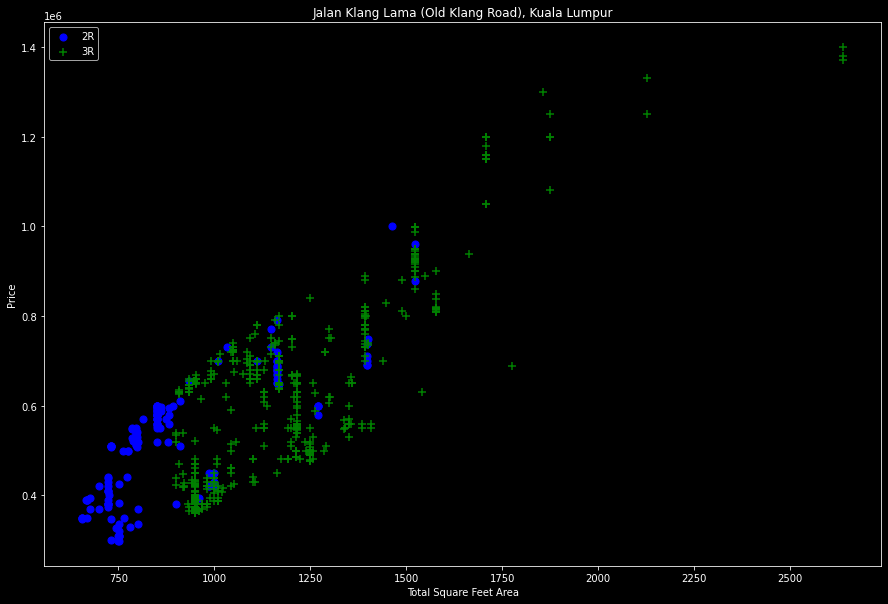

In [ ]:
def plot_scatter_chart(df, location):
  rooms2 = df[(df['Location'] == location) & (df['Rooms'] == 2)]
  rooms3 = df[(df['Location'] == location) & (df['Rooms'] == 3)]
  matplotlib.rcParams['figure.figsize'] = (15,10)
  plt.scatter(rooms2['Size'], rooms2['Price'], color = 'blue', label = '2R', s=50)
  plt.scatter(rooms3['Size'], rooms3['Price'], marker="+", color = 'green', label = '3R', s=50)
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price")
  plt.title(location)
  plt.legend()

plot_scatter_chart(df12, "Jalan Klang Lama (Old Klang Road), Kuala Lumpur")

In [ ]:
def remove_rooms_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('Location'):
    rooms_stats = {}
    for rooms, rooms_df in location_df.groupby('Rooms'):
      rooms_stats[rooms] = {
          'mean' : np.mean(rooms_df.Price_Per_Sqft),
          'std' : np.std(rooms_df.Price_Per_Sqft),
          'count' : rooms_df.shape[0]
      }
    for rooms, rooms_df in location_df.groupby('Rooms'):
      stats = rooms_stats.get(rooms - 1)
      if stats and stats['count'] > 5:
        exclude_indices = np.append(exclude_indices, rooms_df[rooms_df.Price_Per_Sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df13 = remove_rooms_outliers(df12)
df13.shape

(20920, 8)

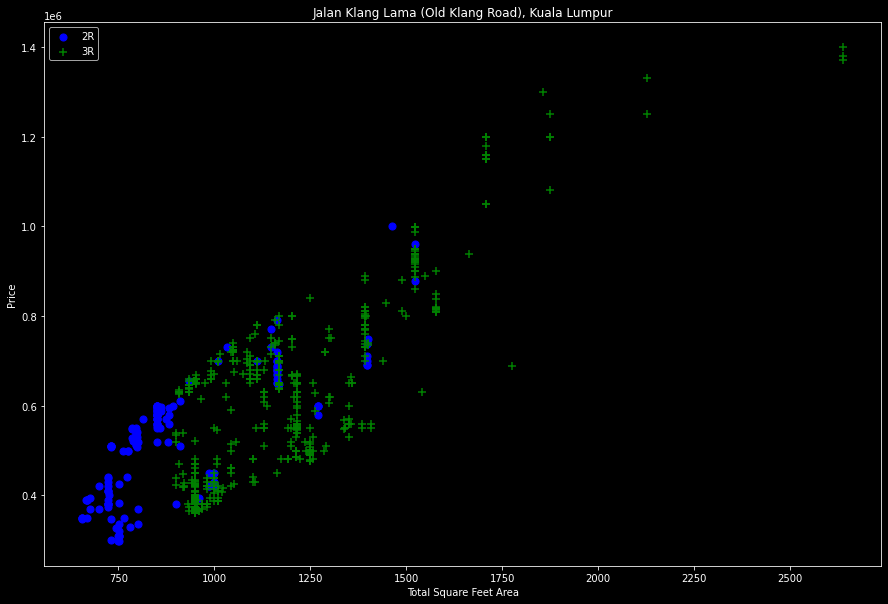

In [ ]:
plot_scatter_chart(df13, "Jalan Klang Lama (Old Klang Road), Kuala Lumpur")

Text(0, 0.5, 'Count')

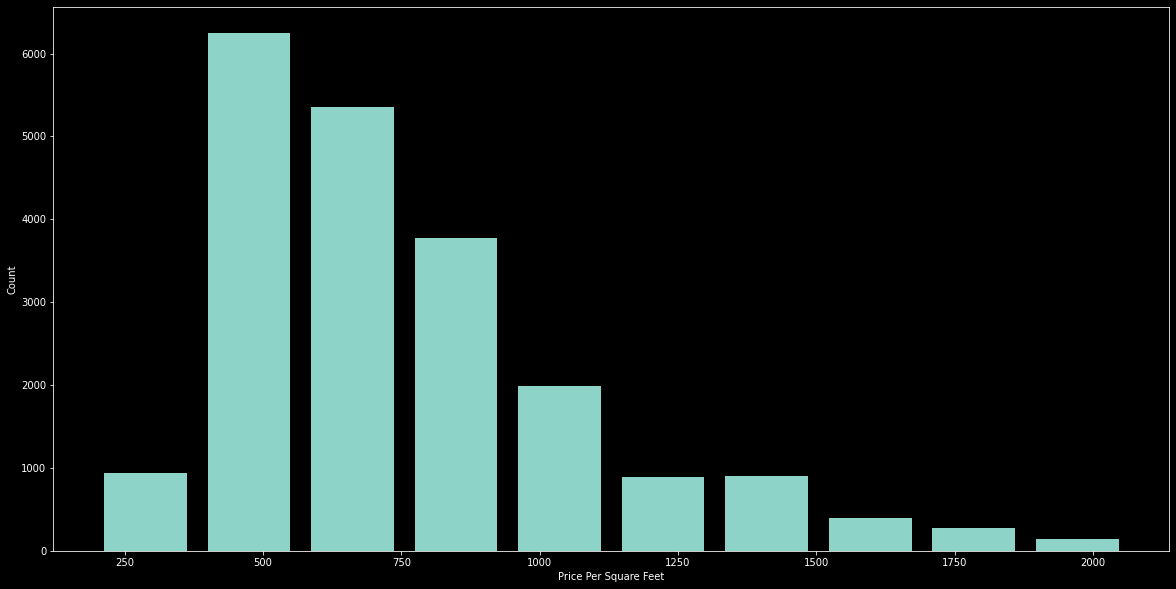

In [ ]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df13['Price_Per_Sqft'], rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [ ]:
df13['Bathrooms'].unique()

array([ 1.,  6.,  5.,  2.,  4.,  3.,  7.,  9.,  8., 13., 20., 15., 10.,
       12., 11., 14., 16.])

In [ ]:
df14 = df13[df13['Bathrooms'] < (df13['Rooms'] + 2)] 
df14.shape

(20793, 8)

In [ ]:
df14

,Location,Price,Size,Rooms,Bathrooms,Car Parks,Furnishing,Price_Per_Sqft
1,"Ampang Hilir, Kuala Lumpur",460000,613.0,1,1.0,1.0,Fully Furnished,750.407830
2,"Ampang Hilir, Kuala Lumpur",4800000,4300.0,5,6.0,3.0,Partly Furnished,1116.279070
3,"Ampang Hilir, Kuala Lumpur",3780000,3628.0,5,5.0,4.0,Partly Furnished,1041.896362
5,"Ampang Hilir, Kuala Lumpur",1050000,959.0,2,2.0,1.0,Fully Furnished,1094.890511
6,"Ampang Hilir, Kuala Lumpur",2600000,2700.0,4,5.0,3.0,Partly Furnished,962.962963
...,...,...,...,...,...,...,...,...
20986,"Wangsa Maju, Kuala Lumpur",620000,1515.0,4,2.0,2.0,Partly Furnished,409.240924
20987,"Wangsa Maju, Kuala Lumpur",390000,688.0,2,2.0,1.0,Partly Furnished,566.860465
20988,"Wangsa Maju, Kuala Lumpur",480000,1150.0,3,2.0,1.0,Unfurnished,417.391304
20989,"Wangsa Maju, Kuala Lumpur",485000,1150.0,3,2.0,1.0,Unfurnished,421.739130


In [ ]:
df15 = df14[['Location', 'Size', 'Bathrooms', 'Price', 'Rooms']]
df15

,Location,Size,Bathrooms,Price,Rooms
1,"Ampang Hilir, Kuala Lumpur",613.0,1.0,460000,1
2,"Ampang Hilir, Kuala Lumpur",4300.0,6.0,4800000,5
3,"Ampang Hilir, Kuala Lumpur",3628.0,5.0,3780000,5
5,"Ampang Hilir, Kuala Lumpur",959.0,2.0,1050000,2
6,"Ampang Hilir, Kuala Lumpur",2700.0,5.0,2600000,4
...,...,...,...,...,...
20986,"Wangsa Maju, Kuala Lumpur",1515.0,2.0,620000,4
20987,"Wangsa Maju, Kuala Lumpur",688.0,2.0,390000,2
20988,"Wangsa Maju, Kuala Lumpur",1150.0,2.0,480000,3
20989,"Wangsa Maju, Kuala Lumpur",1150.0,2.0,485000,3


In [ ]:
df15.describe()

,Size,Bathrooms,Price,Rooms
count,20793.000000,20793.000000,2.079300e+04,20793.000000
mean,1947.854664,2.881114,1.505895e+06,3.458472
std,1980.810609,1.446362,1.770579e+06,1.359425
min,325.000000,1.000000,2.250000e+05,1.000000
25%,1027.000000,2.000000,5.980000e+05,3.000000
50%,1333.000000,2.000000,9.250000e+05,3.000000
75%,2018.000000,4.000000,1.700000e+06,4.000000
max,39000.000000,20.000000,3.500000e+07,20.000000


# **Machine Learning Modeling**

In [ ]:
dummies = pd.get_dummies(df15['Location'])
dummies.head()

,"Ampang Hilir, Kuala Lumpur","Ampang, Kuala Lumpur","Bandar Damai Perdana, Kuala Lumpur","Bandar Menjalara, Kuala Lumpur","Bandar Tasik Selatan, Kuala Lumpur","Bangsar South, Kuala Lumpur","Bangsar, Kuala Lumpur","Batu Caves, Kuala Lumpur","Brickfields, Kuala Lumpur","Bukit Bintang, Kuala Lumpur","Bukit Jalil, Kuala Lumpur","Bukit Tunku (Kenny Hills), Kuala Lumpur","Cheras, Kuala Lumpur","City Centre, Kuala Lumpur","Country Heights Damansara, Kuala Lumpur","Damansara Heights, Kuala Lumpur","Damansara, Kuala Lumpur","Desa Pandan, Kuala Lumpur","Desa ParkCity, Kuala Lumpur","Desa Petaling, Kuala Lumpur","Dutamas, Kuala Lumpur","Jalan Ipoh, Kuala Lumpur","Jalan Klang Lama (Old Klang Road), Kuala Lumpur","Jalan Kuching, Kuala Lumpur","Jalan Sultan Ismail, Kuala Lumpur","Jinjang, Kuala Lumpur","KL City, Kuala Lumpur","KL Eco City, Kuala Lumpur","KL Sentral, Kuala Lumpur","KLCC, Kuala Lumpur","Kepong, Kuala Lumpur","Keramat, Kuala Lumpur","Kuchai Lama, Kuala Lumpur","Mid Valley City, Kuala Lumpur","Mont Kiara, Kuala Lumpur","OUG, Kuala Lumpur",Other,"Pandan Indah, Kuala Lumpur","Pandan Perdana, Kuala Lumpur","Pantai, Kuala Lumpur","Puchong, Kuala Lumpur","Salak Selatan, Kuala Lumpur","Segambut, Kuala Lumpur","Sentul, Kuala Lumpur","Seputeh, Kuala Lumpur","Setapak, Kuala Lumpur","Setiawangsa, Kuala Lumpur","Sri Hartamas, Kuala Lumpur","Sri Petaling, Kuala Lumpur","Sungai Besi, Kuala Lumpur","Sunway SPK, Kuala Lumpur","Taman Desa, Kuala Lumpur","Taman Duta, Kuala Lumpur","Taman Melawati, Kuala Lumpur","Taman Tun Dr Ismail, Kuala Lumpur","Titiwangsa, Kuala Lumpur","Wangsa Maju, Kuala Lumpur"
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df16 = pd.concat([df15, dummies.drop('Other', axis='columns')], axis='columns')
df16.head()

,Location,Size,Bathrooms,Price,Rooms,"Ampang Hilir, Kuala Lumpur","Ampang, Kuala Lumpur","Bandar Damai Perdana, Kuala Lumpur","Bandar Menjalara, Kuala Lumpur","Bandar Tasik Selatan, Kuala Lumpur","Bangsar South, Kuala Lumpur","Bangsar, Kuala Lumpur","Batu Caves, Kuala Lumpur","Brickfields, Kuala Lumpur","Bukit Bintang, Kuala Lumpur","Bukit Jalil, Kuala Lumpur","Bukit Tunku (Kenny Hills), Kuala Lumpur","Cheras, Kuala Lumpur","City Centre, Kuala Lumpur","Country Heights Damansara, Kuala Lumpur","Damansara Heights, Kuala Lumpur","Damansara, Kuala Lumpur","Desa Pandan, Kuala Lumpur","Desa ParkCity, Kuala Lumpur","Desa Petaling, Kuala Lumpur","Dutamas, Kuala Lumpur","Jalan Ipoh, Kuala Lumpur","Jalan Klang Lama (Old Klang Road), Kuala Lumpur","Jalan Kuching, Kuala Lumpur","Jalan Sultan Ismail, Kuala Lumpur","Jinjang, Kuala Lumpur","KL City, Kuala Lumpur","KL Eco City, Kuala Lumpur","KL Sentral, Kuala Lumpur","KLCC, Kuala Lumpur","Kepong, Kuala Lumpur","Keramat, Kuala Lumpur","Kuchai Lama, Kuala Lumpur","Mid Valley City, Kuala Lumpur","Mont Kiara, Kuala Lumpur","OUG, Kuala Lumpur","Pandan Indah, Kuala Lumpur","Pandan Perdana, Kuala Lumpur","Pantai, Kuala Lumpur","Puchong, Kuala Lumpur","Salak Selatan, Kuala Lumpur","Segambut, Kuala Lumpur","Sentul, Kuala Lumpur","Seputeh, Kuala Lumpur","Setapak, Kuala Lumpur","Setiawangsa, Kuala Lumpur","Sri Hartamas, Kuala Lumpur","Sri Petaling, Kuala Lumpur","Sungai Besi, Kuala Lumpur","Sunway SPK, Kuala Lumpur","Taman Desa, Kuala Lumpur","Taman Duta, Kuala Lumpur","Taman Melawati, Kuala Lumpur","Taman Tun Dr Ismail, Kuala Lumpur","Titiwangsa, Kuala Lumpur","Wangsa Maju, Kuala Lumpur"
1,"Ampang Hilir, Kuala Lumpur",613.0,1.0,460000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Ampang Hilir, Kuala Lumpur",4300.0,6.0,4800000,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Ampang Hilir, Kuala Lumpur",3628.0,5.0,3780000,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,"Ampang Hilir, Kuala Lumpur",959.0,2.0,1050000,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,"Ampang Hilir, Kuala Lumpur",2700.0,5.0,2600000,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df17 = df16.drop('Location', axis='columns')
df17.head()

,Size,Bathrooms,Price,Rooms,"Ampang Hilir, Kuala Lumpur","Ampang, Kuala Lumpur","Bandar Damai Perdana, Kuala Lumpur","Bandar Menjalara, Kuala Lumpur","Bandar Tasik Selatan, Kuala Lumpur","Bangsar South, Kuala Lumpur","Bangsar, Kuala Lumpur","Batu Caves, Kuala Lumpur","Brickfields, Kuala Lumpur","Bukit Bintang, Kuala Lumpur","Bukit Jalil, Kuala Lumpur","Bukit Tunku (Kenny Hills), Kuala Lumpur","Cheras, Kuala Lumpur","City Centre, Kuala Lumpur","Country Heights Damansara, Kuala Lumpur","Damansara Heights, Kuala Lumpur","Damansara, Kuala Lumpur","Desa Pandan, Kuala Lumpur","Desa ParkCity, Kuala Lumpur","Desa Petaling, Kuala Lumpur","Dutamas, Kuala Lumpur","Jalan Ipoh, Kuala Lumpur","Jalan Klang Lama (Old Klang Road), Kuala Lumpur","Jalan Kuching, Kuala Lumpur","Jalan Sultan Ismail, Kuala Lumpur","Jinjang, Kuala Lumpur","KL City, Kuala Lumpur","KL Eco City, Kuala Lumpur","KL Sentral, Kuala Lumpur","KLCC, Kuala Lumpur","Kepong, Kuala Lumpur","Keramat, Kuala Lumpur","Kuchai Lama, Kuala Lumpur","Mid Valley City, Kuala Lumpur","Mont Kiara, Kuala Lumpur","OUG, Kuala Lumpur","Pandan Indah, Kuala Lumpur","Pandan Perdana, Kuala Lumpur","Pantai, Kuala Lumpur","Puchong, Kuala Lumpur","Salak Selatan, Kuala Lumpur","Segambut, Kuala Lumpur","Sentul, Kuala Lumpur","Seputeh, Kuala Lumpur","Setapak, Kuala Lumpur","Setiawangsa, Kuala Lumpur","Sri Hartamas, Kuala Lumpur","Sri Petaling, Kuala Lumpur","Sungai Besi, Kuala Lumpur","Sunway SPK, Kuala Lumpur","Taman Desa, Kuala Lumpur","Taman Duta, Kuala Lumpur","Taman Melawati, Kuala Lumpur","Taman Tun Dr Ismail, Kuala Lumpur","Titiwangsa, Kuala Lumpur","Wangsa Maju, Kuala Lumpur"
1,613.0,1.0,460000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4300.0,6.0,4800000,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3628.0,5.0,3780000,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,959.0,2.0,1050000,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2700.0,5.0,2600000,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df17.shape

(20793, 60)

In [132]:
#Independent variables
X = df17.drop('Price', axis='columns')
X.head()

,Size,Bathrooms,Rooms,"Ampang Hilir, Kuala Lumpur","Ampang, Kuala Lumpur","Bandar Damai Perdana, Kuala Lumpur","Bandar Menjalara, Kuala Lumpur","Bandar Tasik Selatan, Kuala Lumpur","Bangsar South, Kuala Lumpur","Bangsar, Kuala Lumpur","Batu Caves, Kuala Lumpur","Brickfields, Kuala Lumpur","Bukit Bintang, Kuala Lumpur","Bukit Jalil, Kuala Lumpur","Bukit Tunku (Kenny Hills), Kuala Lumpur","Cheras, Kuala Lumpur","City Centre, Kuala Lumpur","Country Heights Damansara, Kuala Lumpur","Damansara Heights, Kuala Lumpur","Damansara, Kuala Lumpur","Desa Pandan, Kuala Lumpur","Desa ParkCity, Kuala Lumpur","Desa Petaling, Kuala Lumpur","Dutamas, Kuala Lumpur","Jalan Ipoh, Kuala Lumpur","Jalan Klang Lama (Old Klang Road), Kuala Lumpur","Jalan Kuching, Kuala Lumpur","Jalan Sultan Ismail, Kuala Lumpur","Jinjang, Kuala Lumpur","KL City, Kuala Lumpur","KL Eco City, Kuala Lumpur","KL Sentral, Kuala Lumpur","KLCC, Kuala Lumpur","Kepong, Kuala Lumpur","Keramat, Kuala Lumpur","Kuchai Lama, Kuala Lumpur","Mid Valley City, Kuala Lumpur","Mont Kiara, Kuala Lumpur","OUG, Kuala Lumpur","Pandan Indah, Kuala Lumpur","Pandan Perdana, Kuala Lumpur","Pantai, Kuala Lumpur","Puchong, Kuala Lumpur","Salak Selatan, Kuala Lumpur","Segambut, Kuala Lumpur","Sentul, Kuala Lumpur","Seputeh, Kuala Lumpur","Setapak, Kuala Lumpur","Setiawangsa, Kuala Lumpur","Sri Hartamas, Kuala Lumpur","Sri Petaling, Kuala Lumpur","Sungai Besi, Kuala Lumpur","Sunway SPK, Kuala Lumpur","Taman Desa, Kuala Lumpur","Taman Duta, Kuala Lumpur","Taman Melawati, Kuala Lumpur","Taman Tun Dr Ismail, Kuala Lumpur","Titiwangsa, Kuala Lumpur","Wangsa Maju, Kuala Lumpur"
1,613.0,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4300.0,6.0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3628.0,5.0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,959.0,2.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2700.0,5.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Dependent variables
y = df17['Price']
y.head()

1     460000
2    4800000
3    3780000
5    1050000
6    2600000
Name: Price, dtype: int64

In [ ]:
#Split into test and training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [ ]:
#Fit & evaluate Linear Regression model
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
model_lr.score(X_test, y_test)

0.8861933870368707

In [ ]:
#K-Fold Cross Validation (Resampling procedure for model evaluation)
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.87561694, 0.89053388, 0.87465858, 0.86331476, 0.87872903])

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(X,y):
  algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }

  scores = []

  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  for algo_name, config in algos.items():
      gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
      gs.fit(X,y)
      scores.append({
          'model': algo_name,
          'best_score': gs.best_score_,
          'best_params': gs.best_params_
      })

  return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2719607487339585.5, tolerance: 5060118594863.773
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2929361232721734.0, tolerance: 5244463348277.875
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2800167420344769.0, tolerance: 5201838748997.89
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2754126180

,model,best_score,best_params
0,linear_regression,0.876571,{'normalize': True}
1,lasso,0.876566,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.894936,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [ ]:
#Fit & evaluate Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
model_dtr = DecisionTreeRegressor(criterion='mse', splitter='best')
model_dtr.fit(X_train, y_train)
model_dtr.score(X_test, y_test)

0.9207376114993676

In [ ]:
def price_predict(location, sqft, bath, rooms):
  loc_index = np.where(X.columns == location)[0][0]

  x = np.zeros(len(X.columns))
  x[0] = sqft
  x[1] = bath
  x[2] = rooms
  if loc_index >= 0:
    x[loc_index] = 1
  
  return model_dtr.predict([x])[0]

In [ ]:
price_predict('Ampang Hilir, Kuala Lumpur', 1000, 2, 2)

475000.0

In [ ]:
#Exporting the Decision Tree Regressor model
import pickle
with open("kl_real_estate_dtr.pickle", "wb") as f:
  pickle.dump(model_dtr, f)

from google.colab import files
files.download("kl_real_estate_dtr.pickle")

In [ ]:
# #Exporting the Linear Regression model
# import pickle
# with open("kl_real_estate_lr.pickle", "wb") as f:
#   pickle.dump(model_lr, f)

# from google.colab import files
# files.download("kl_real_estate_lr.pickle")

In [ ]:
#Exporting columns
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
  f.write(json.dumps(columns))

files.download("columns.json")